# Terceiro Projeto

O dataset utilizado tem 3 colunas. Cada linha representa um projeto de um site web, e as colunas referem-se à quantidade de horas estimadas para que um web designer termine o projeto, e a coluna de preço determina o quanto o cliente deseja pagar pelo projeto. A coluna das labels (unfinished), diz se aquele projeto foi terminado ou não.  

O que queremos fazer, é: a partir do quanto o cliente está disposto a pagar, e também pela estimativa de horas que o projeto vai demandar, se o projeto será finalizado ou não. Ou seja, se o valor por hora que o cliente vai pagar será suficiente para concluir o projeto.

#### Configurando projeto e importando dados

In [28]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

data = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Renomeando colunas

In [29]:
rename_map = {
  "expected_hours": "horas_esperadas",
  "price": "preco",
  "unfinished": "nao_finalizado"
}

data = data.rename(columns = rename_map)

Agora vamos fazer a coluna de "não finalizado" virar uma coluna de "finalizado". Ou seja, o que era 0 vira 1, e o que era 1 vira 0

In [30]:
swap = {
  0 : 1,
  1 : 0
}

# Aqui ele ta percorrendo cada valor da coluna nao_finalizado,
# aplicando o swap e jogando no final esse novo valor para a nova coluna "finalizado"
data["finalizado"] = data.nao_finalizado.map(swap)
data.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [31]:
data.tail() # Mostra o final, tail é cauda em ingles

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


Visualizando dados

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

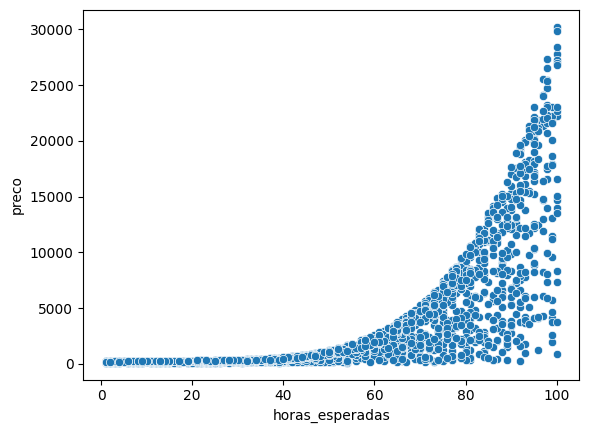

In [32]:
# Como nesse caso temos so duas features, podemos mostrar no eixo X uma delas, e no Y a outra

import seaborn as sns
# biblioteca para plotar graficos

# scatter == espalhados
sns.scatterplot(x = "horas_esperadas", y = "preco", data=data)

In [33]:
#!pip install seaborn==0.9.0

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

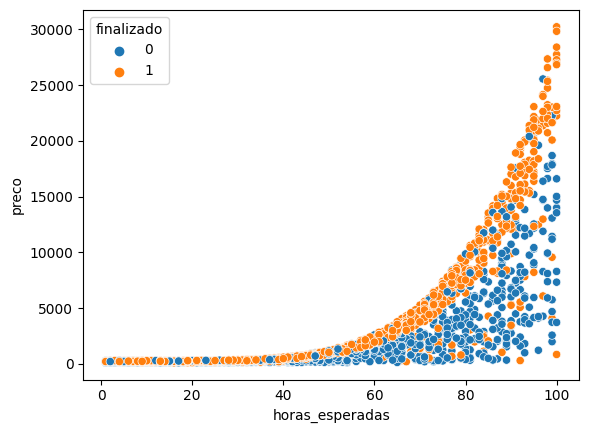

In [34]:
# Agora queremos colorir os dados de acordo com a sua finalização ou não
# Para isso usamos o parametro hue, e determinamos qual vai ser a coluna para isso

sns.scatterplot(x = "horas_esperadas", y = "preco", hue = "finalizado", data = data)

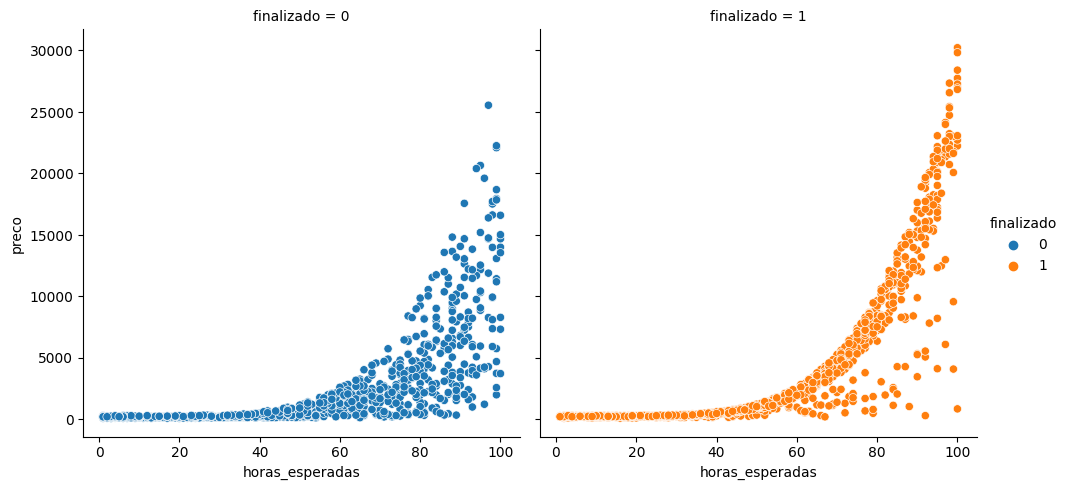

In [35]:
# queremos plotar agora de maneira que tenhamos um grafico com os projetos que foram finalizados
# e outro grafico com os projetos que nao foram. Ou seja, graficos relativos. Para isso, usamos
# o relplot. Usamos col para dizer qual a coluna será a que relativizará os gráficos

sns.relplot(x = "horas_esperadas", y = "preco", hue="finalizado", col = "finalizado", data = data)

In [36]:
x = data[["horas_esperadas", "preco"]]
y = data["finalizado"]

y.head()

0    0
1    0
2    0
3    0
4    0
Name: finalizado, dtype: int64

#### Splitando treino e teste

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 17
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    train_size=0.75,
                                                    stratify=y
                                                    )


#### Configurando modelo

In [38]:
from sklearn.svm import LinearSVC

# o random_state serve para a gente poder obter os mesmos valores aleatorios em cada execução
# model = LinearSVC(random_state=SEED)

# o random_state por padrão, utiliza o random do numpy, logo,
# se definirmos previamente qual será o estado randomico do numpy (np.random.seed),
# nao precisamos passar para cada função dessas, uma vez que bastará modificar o numpy.random()
# para poder modificar o random_state em todas elas.

model = LinearSVC()

#### Treinando o modelo

In [39]:
print(f"Training with {len(train_x)} elements")
model.fit(train_x, train_y)

Training with 1617 elements


c:\Users\teste2\develop\python\machine_learning\conceitos-alura\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

#### Validando o modelo

In [40]:
from sklearn.metrics import accuracy_score

predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions) * 100

print(f"Accuracy of model in {len(test_y)} elements of data test was {accuracy:.2f}%")

Accuracy of model in 540 elements of data test was 53.33%


In [41]:
baseline = np.ones(540) # Chutando tudo 1
acc_prev_base = accuracy_score(test_y, baseline) * 100

print(f"Accuracy of baseline algorithm in {len(test_y)} elements of data test was {acc_prev_base:.2f}%")

Accuracy of baseline algorithm in 540 elements of data test was 52.59%


In [42]:
# Ou seja, o modelo em praticamente todos os casos não supera a linha de base. O modelo ta péssimo

Analisando cada uma das classificações

<AxesSubplot: xlabel='horas_esperadas', ylabel='preco'>

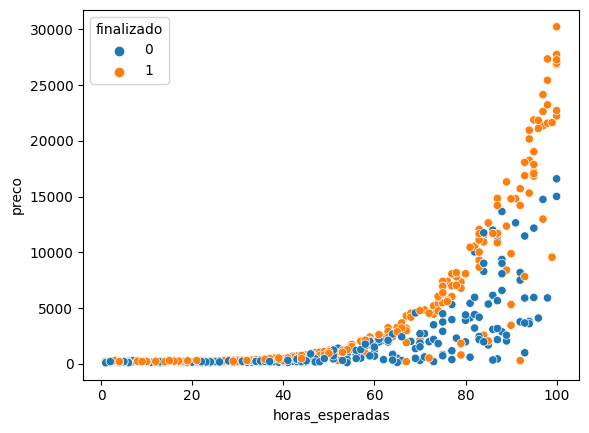

In [43]:
# A cor nao pode ser o campo "finalizado" porque no test_x so tem as colunas de features
sns.scatterplot(x = "horas_esperadas", y = "preco", hue = test_y, data = test_x)

In [44]:
# Vamos fazer uma analise que so é feita para duas dimensões

x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()

y_min = test_x.preco.min()
y_max = test_x.preco.max()

print(f"X: [{x_min}, {x_max}]")
print(f"Y: [{y_min}, {y_max}]")

X: [1, 100]
Y: [100, 30223]


In [45]:
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [46]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

In [47]:
z = model.predict(pontos)
z = z.reshape(xx.shape)

z.shape

c:\Users\teste2\develop\python\machine_learning\conceitos-alura\venv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(100, 100)

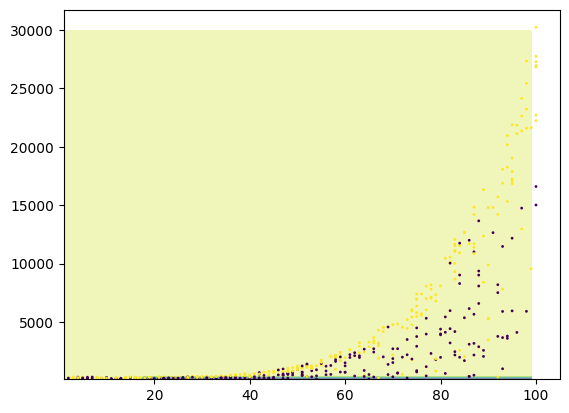

In [48]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c = test_y, s = 1)

# Decision Boundary -> curva de decisão

## Testando um estimador de relacionamento não-lineares

In [49]:
from sklearn.svm import SVC

model_svc = SVC(gamma='auto')

#### Pre-processing

Precisamos deixar as features numa mesma faixa. No nosso caso, estamos com uma feature entre 0 e 30k, e outra feature entre 0 e 100, sao dimensões muito distintas o que causa uma piora no algoritmo.

Ou seja, precisamos reescalar esses ranges

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

raw_train_x = train_x
raw_test_x = test_x

# aprende a reescalar meus dados ai
scaler.fit(raw_train_x)

# transforma o train_x e test_x no train_x e test_x novo, com dados reescalados
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

#### Train

In [51]:
model_svc.fit(train_x, train_y)

SVC(gamma='auto')

#### Validation

In [52]:
from sklearn.metrics import accuracy_score

predictions = model_svc.predict(test_x)
accuracy = accuracy_score(test_y, predictions) * 100

print(f"Accuracy of model in {len(test_y)} elements of data test was {accuracy:.2f}%")

Accuracy of model in 540 elements of data test was 67.96%


X: [-1.7182002421071034, 1.7478848599296857]
Y: [-0.6059001933738359, 5.589501751757544]


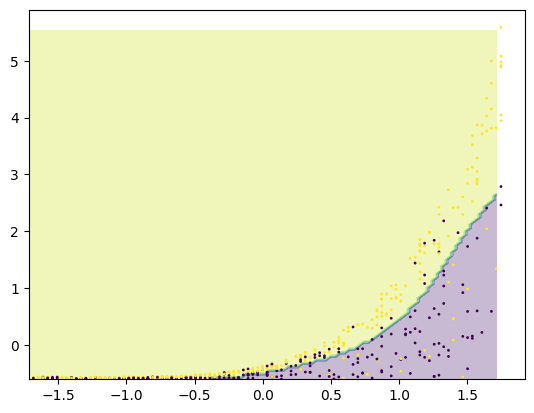

In [53]:
data_x = test_x[:, 0] # pegando toda a primeira coluna 
data_y = test_x[:, 1] # pegando toda a segunda coluna

# Vamos fazer uma analise que so é feita para duas dimensões

x_min = data_x.min()
x_max = data_x.max()

y_min = data_y.min()
y_max = data_y.max()

print(f"X: [{x_min}, {x_max}]")
print(f"Y: [{y_min}, {y_max}]")

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

z = model_svc.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c = test_y, s = 1)